# CADUTA LIBERA


linearità A + BX
    
A: -0.00016317929872118261 
B: 0.202085279787101
sigmaA: 0.00043757875381327
sigmaB: 0.00099705330877366

sigmaY: [0.00072578 0.00074751 0.00075062 0.00079399 0.00082371 0.0008609
 0.00097931 0.0008143  0.00096627 0.00092211 0.00104563 0.00118986
 0.0007267 ]
chiquadro ridotto: 0.0
df: 11
    



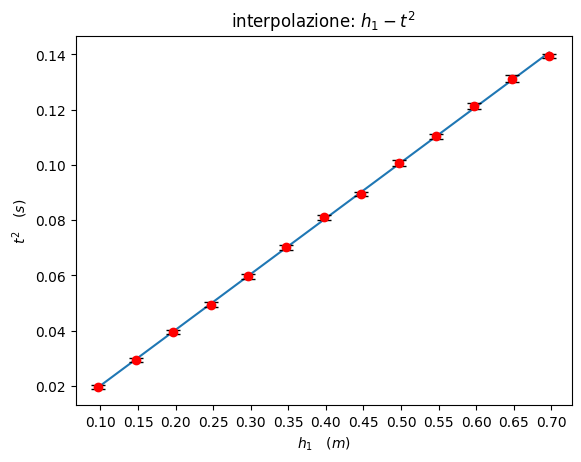

g:  9.897 ± 0.098 


In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolata, final_val
import os

FILE = os.path.abspath('') + '/../CSV/' + 'caduta_libera.csv'
fr = pd.read_csv(FILE)

h = np.array([10,15,20,25,30,35,40,45,50,55,60,65,70])

t = []
err_t = []
for i in h:
    colonna = np.array(fr[str(i)])
    t.append(np.mean(colonna))
    err_t.append(np.std(colonna)/np.sqrt(len(colonna)))

t = np.array(t)/1000 # s
err_t = np.array(err_t)/1000 # s
h = h*0.01 + 0.004 + 0.009 - 0.016 # coorezioni pedana

r = RettaInterpolata(h,t**2,err_t*t*2) # propagato err_t
print(r)
plt.title("interpolazione: $h_1 - t^{2}$")
plt.plot(r.x_best,r.y_best)
plt.errorbar(h,t**2,fmt='o',yerr=r.sigmaY,color="red",ecolor="black",capsize=5)
plt.xticks(np.round(h,2))
plt.xlabel('$h_1\quad(m)$')
plt.ylabel('$t^{2}\quad(s)$')
plt.show()

g = 2/r.B
sigmag = 2 * g * (r.sigmaB / r.B)

print('g: ',final_val(g,sigmag,decimals=3))